Decision Tree

Tiatnic Survival Dataset

In [81]:
#Import the Necessary Libraries
import pandas as pd
df=pd.read_csv('train(1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
#Load the data sets- train and test 


In [83]:
#Look at top values of train data 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [84]:
#Print the column names of train data


In [85]:
#Print the dimension of train and test data

In [86]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

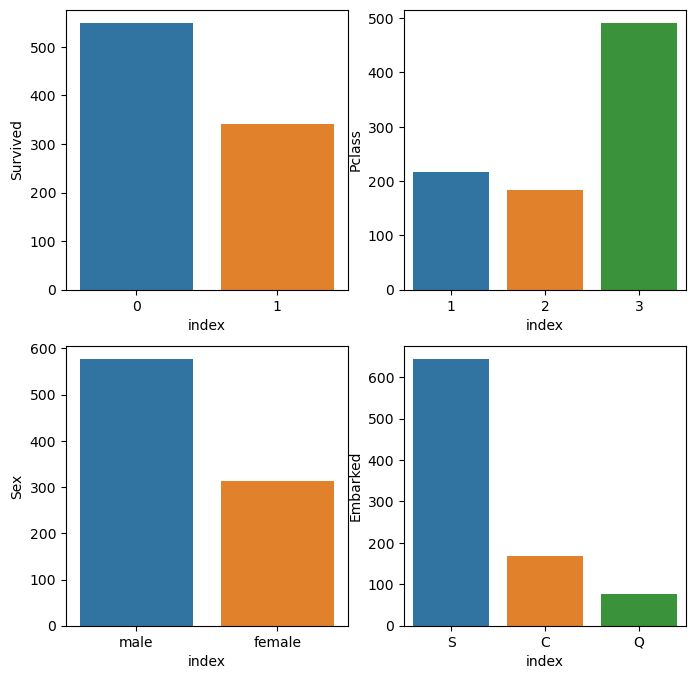

In [87]:
#Barchart of Survived, Pclass, Sex, Embarked
import matplotlib.pyplot as plt
import seaborn as sns
cols=["Survived","Pclass","Sex","Embarked"]
fig,axes=plt.subplots(2,2,figsize=(8,8))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur=axes[i]
    count=df[col].value_counts().reset_index()
    sns.barplot(data=count,x="index",y=col,ax=cur)
plt.show()

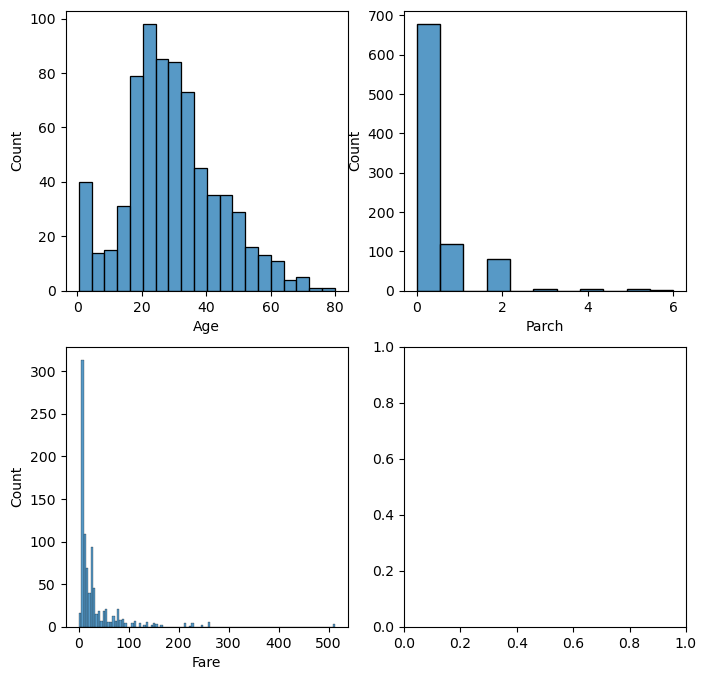

In [88]:
#Histogram of Age, Parch, Fare
cols=["Age","Parch","Fare"]
fig,axes=plt.subplots(2,2,figsize=(8,8))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur=axes[i]
    sns.histplot(data=df,x=col,ax=cur)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

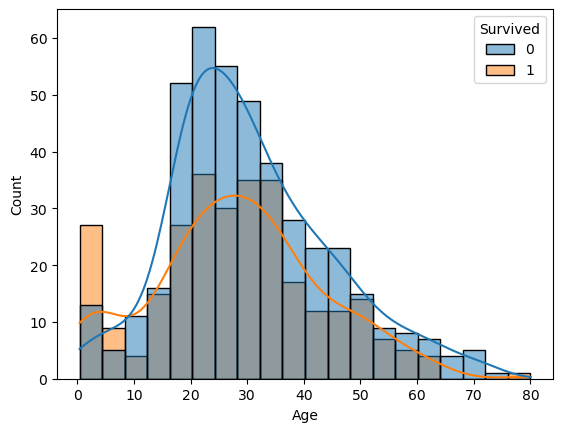

In [89]:
#Plot histogram of age for survived and did not survived class
sns.histplot(data=df,x="Age",hue="Survived",kde=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

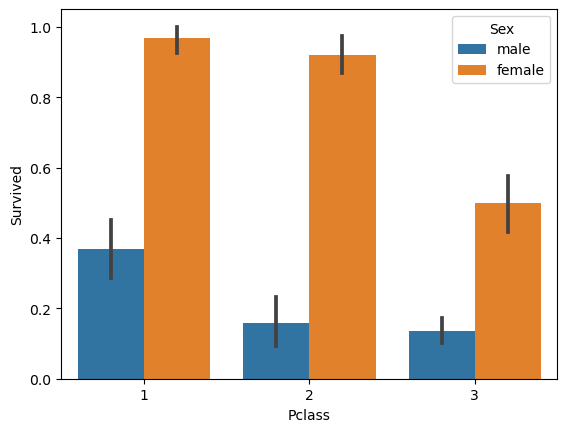

In [90]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
sns.barplot(data=df,x="Pclass",y="Survived",hue="Sex")


<Axes: xlabel='Age', ylabel='Count'>

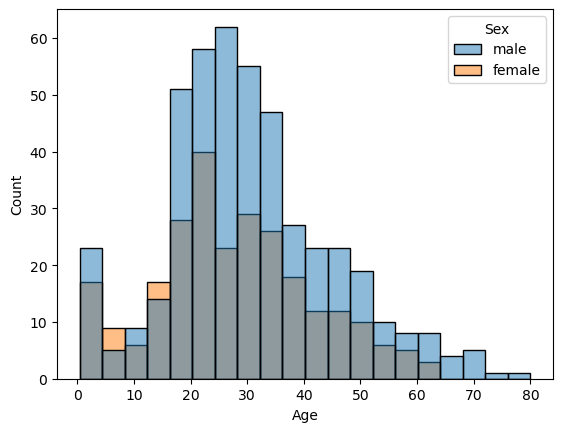

In [91]:
sns.histplot(data=df,x="Age",hue="Sex")

<Axes: xlabel='Age', ylabel='Count'>

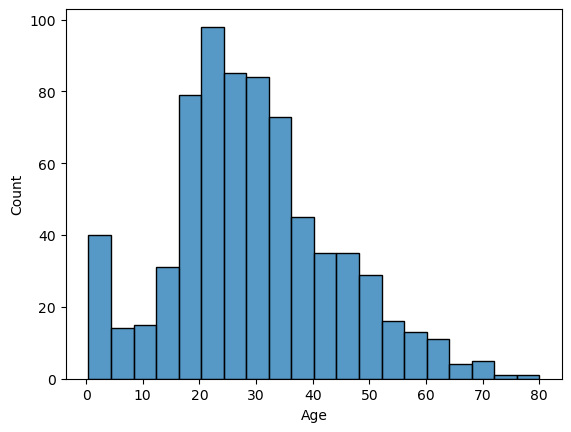

In [92]:
#Histogram of Age of the given data set(sample)
sns.histplot(data=df,x="Age")


## Handling Missing Values

In [93]:
#Replace the msiing values in Embarked column by 'S'
df["Embarked"].fillna("S",inplace=True)

In [94]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [95]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
  
import numpy as np
age_mean=np.mean(df["Age"])
age_dev=np.std(df["Age"])
print(age_mean,age_dev)
def fu(x):
    if pd.isnull(x):
        return np.random.normal(age_mean,age_dev)
    return x
df["Age"]=df["Age"].apply(fu)
age_mea=np.mean(df["Age"])
age_de=np.std(df["Age"])
print(age_mea,age_de)

29.69911764705882 14.516321150817317
29.75318092606769 14.435102473500175


## Feature Engineering - Creating new features

In [96]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch

#FamilySize = Parch + SibSp + 1
df["FamilySize"]=df["Parch"]+df["SibSp"]+1

In [97]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"]=df["FamilySize"]==1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.78725,1,2,W./C. 6607,23.4500,NaN,S,4,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,1,True


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [98]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [99]:
df["Has_Cabin"]=df["Cabin"].notna()

KeyError: 'Cabin'

## Model Building

In [ ]:
#Prepare X and y
x=df.drop(columns="Survived")
x

In [ ]:
y=df["Survived"]

In [ ]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
cols=x.select_dtypes(include="object").columns
for col in cols:
    le=LabelEncoder()
    x[col]=le.fit_transform(x[col])


In [ ]:
x

In [ ]:
# concat df_categorical with original df


In [ ]:
#Do a pairplot of all features
import seaborn as sns
sns.pairplot(x)

In [ ]:
X

In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)

In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
model=dc.fit(x_train,y_train)
model

In [ ]:
#Print the tree
from sklearn.tree import plot_tre

In [ ]:

plot_tree(model,feature_names=x.columns,class_names=["Not Survived","Survived"],filled=True,max_depth=3)
plt.show()

# Importing required packages for visualization

In [ ]:
# plotting tree with max_depth=3


<img src="tree2.png">

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy
y_pred=model.predict(x_test)
y_pred

In [100]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
a

0.8